# Power Outage Analysis
***
The purpose of this notebook is to explore the power outage data.

The following tasks will be performed in this notebook:
- Access data
- Create chart
- Perform analysis
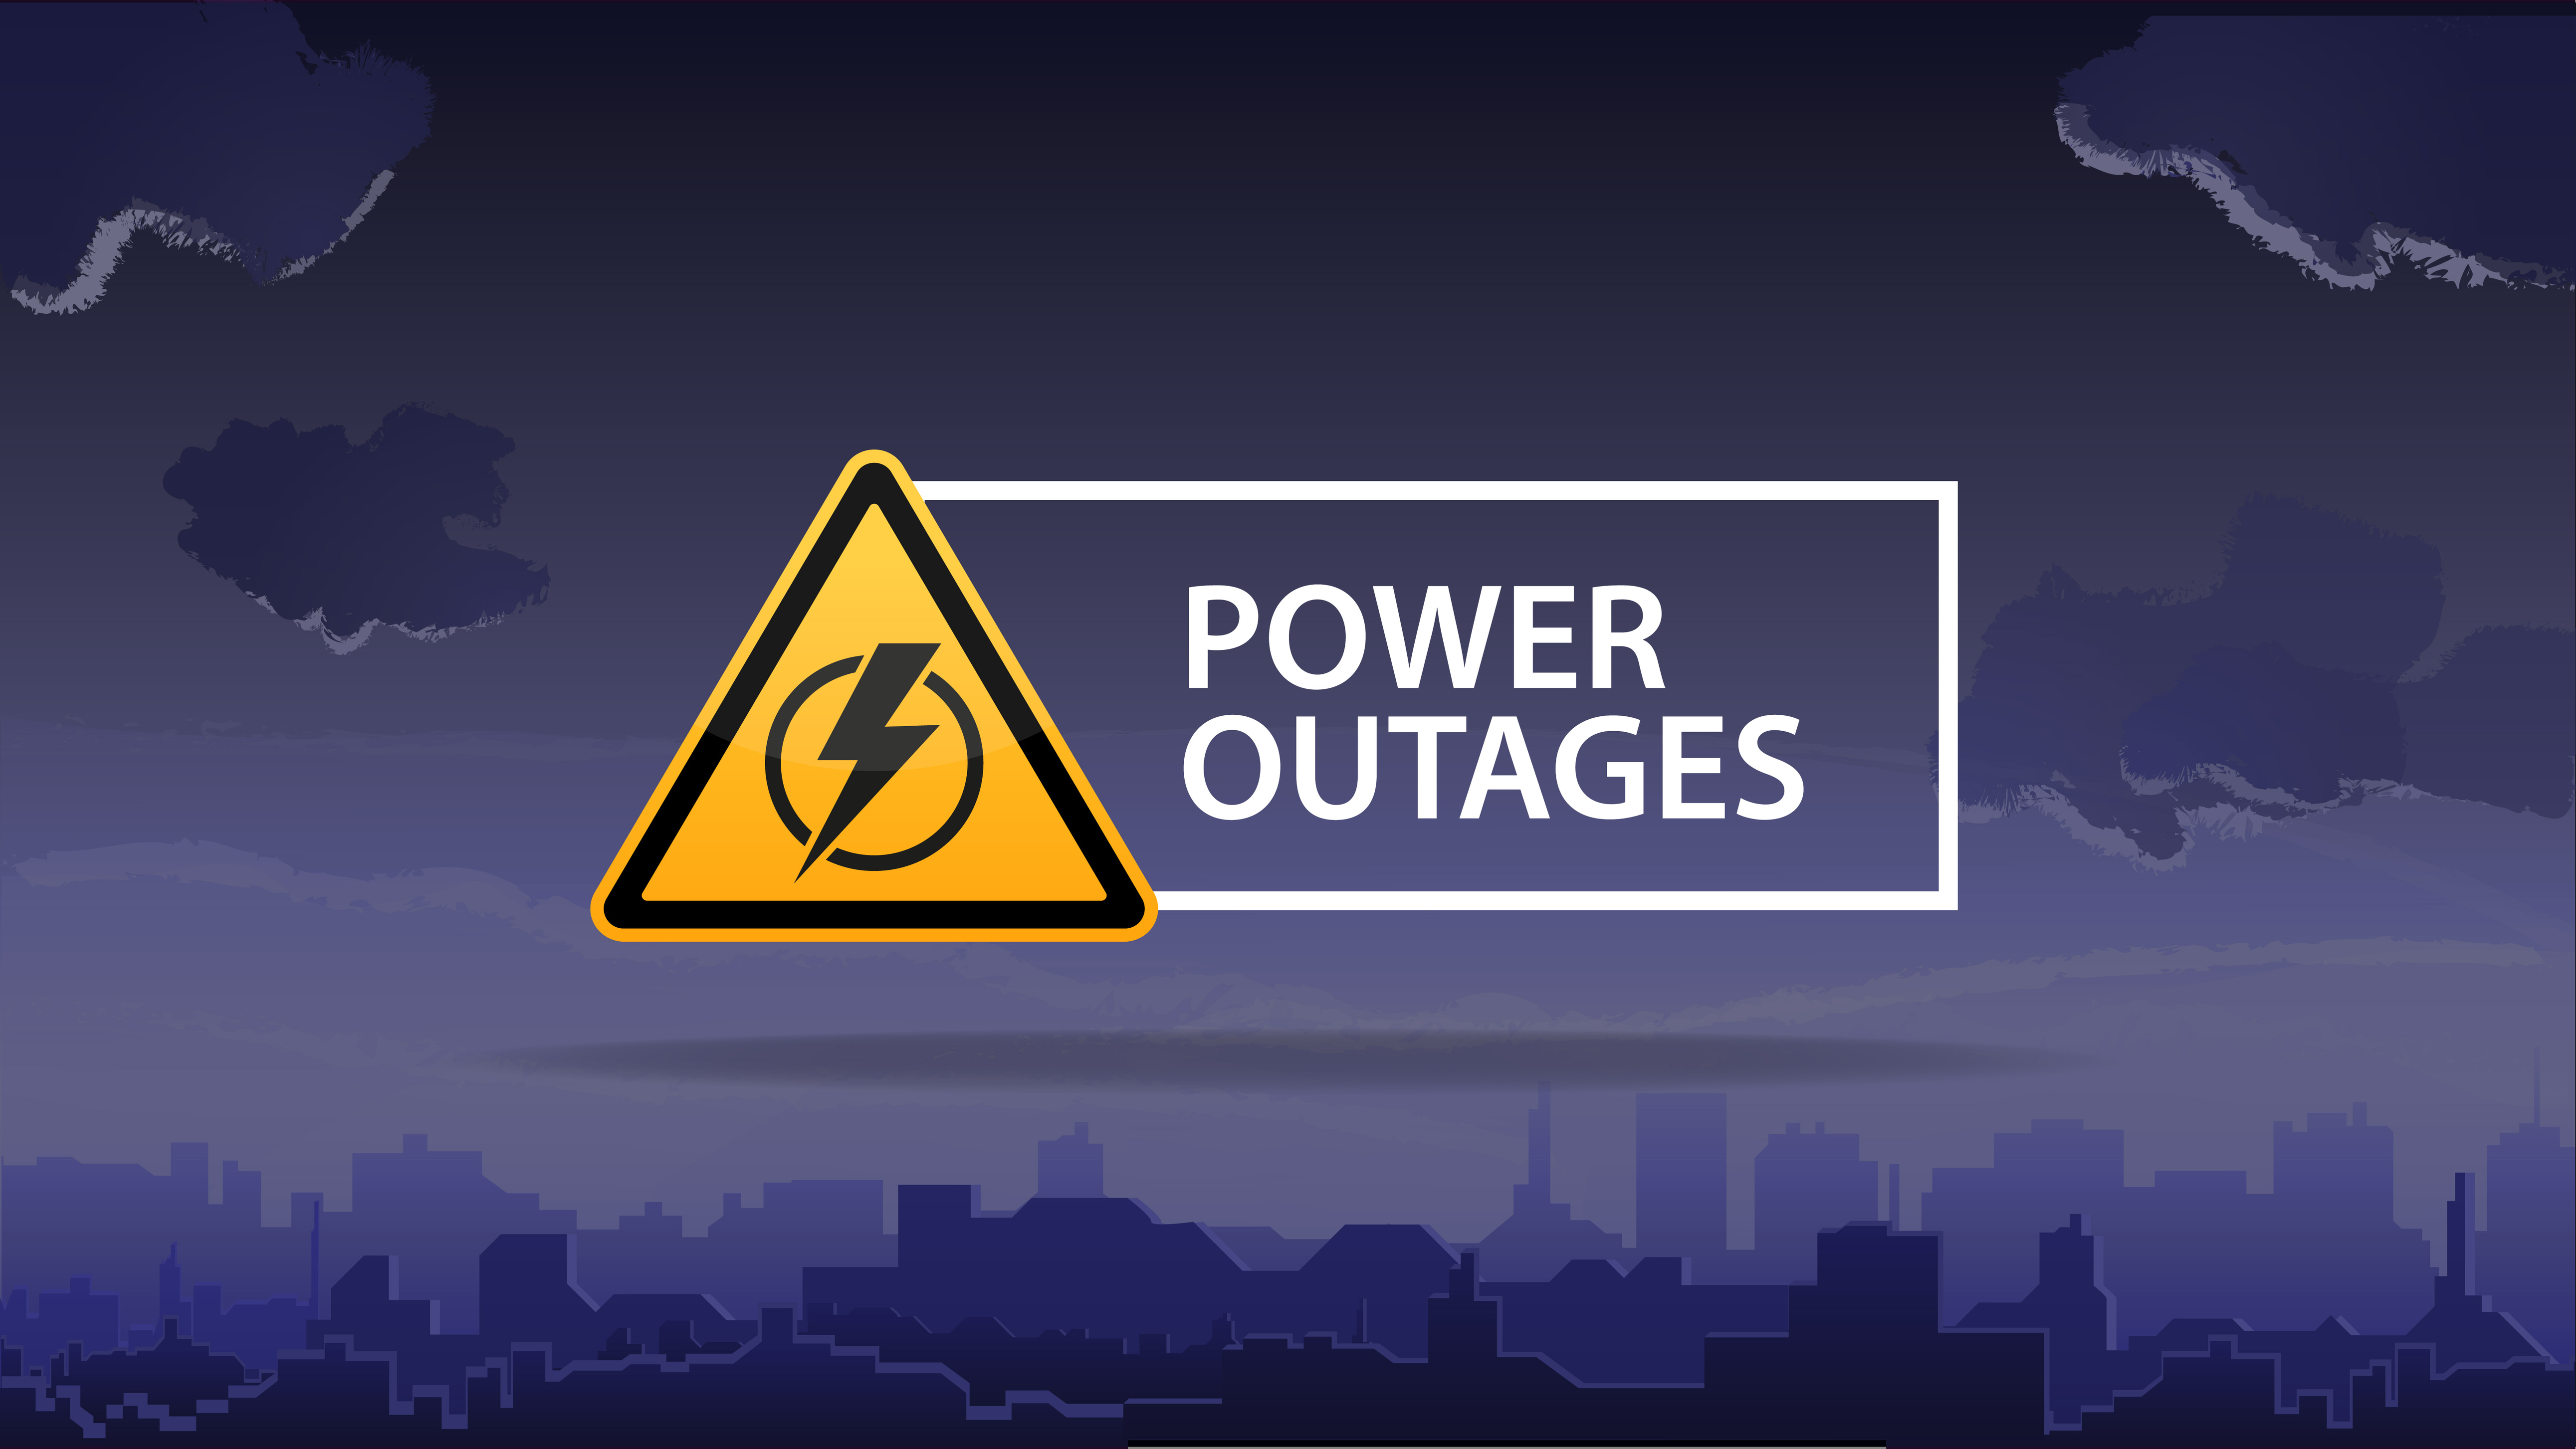

In [1]:
import arcpy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import arcgis

## Access data


In [2]:
outages = r'C:\EsriTraining\PYTS\Data\Outages.gdb\AllOutages'
df = pd.DataFrame.spatial.from_featureclass(outages)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   OBJECTID   575 non-null    int64   
 1   Source     575 non-null    object  
 2   Residents  575 non-null    int32   
 3   SHAPE      575 non-null    geometry
dtypes: geometry(1), int32(1), int64(1), object(1)
memory usage: 15.8+ KB


In [3]:
outage_df = df[['Source','Residents']]
outage_df.head()

,Source,Residents
0,Phone,2
1,Phone,8
2,Phone,8
3,Phone,3
4,Phone,6


In [4]:
outage_df.groupby('Source').agg({'Source':'count'})

,Source
Source,
App,375
Phone,47
SocialMedia,153


## Create chart

In [5]:
source = df['Source'].value_counts()

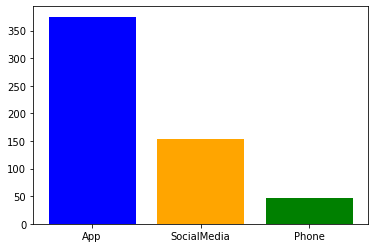

In [6]:
%matplotlib inline
plt.bar(source.index, source, color=['blue', 'orange', 'green'])
plt.show()

## Perform analysis

In [7]:
if arcpy.CheckExtension("Spatial") == "Available":
    outage_density = arcpy.sa.KernelDensity(outages, "Residents", 100, None, "SQUARE_MILES")
    outage_density.save(r"C:\EsriTraining\PYTS\Default.gdb\OutageDensityByResidents")
else:
    msg = "ArcGIS Spatial Analyst extension is not available"
    print(msg)